# Model Robustness Testing with DeepBridge

This notebook demonstrates how to use the robustness testing functionality in DeepBridge to evaluate and compare the robustness of machine learning models.

## 1. Setup and Imports

In [1]:
import numpy as np
import pandas as pd
import sys
import os


import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

sys.path.append(os.path.expanduser("~/projetos/DeepBridge"))

# Import DeepBridge components
from deepbridge.validation import RobustnessTest
from deepbridge.validation import RobustnessScore
from deepbridge.visualization import RobustnessViz

# Set up matplotlib for better visualization in notebook
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

/home/guhaase/projetos/deepbridge_homol/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2. Generate and Prepare Data

In [2]:
# Generate synthetic data
X, y = make_classification(
    n_samples=1000, 
    n_features=10, 
    n_informative=6, 
    n_redundant=2,
    random_state=42
)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display data shape
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Class distribution in training data: {np.bincount(y_train)}")
print(f"Class distribution in testing data: {np.bincount(y_test)}")

Training data shape: (700, 10)
Testing data shape: (300, 10)
Class distribution in training data: [336 364]
Class distribution in testing data: [162 138]


## 3. Train and Evaluate Models

In [3]:
# Train models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Evaluate baseline performance
rf_score = rf_model.score(X_test, y_test)
gb_score = gb_model.score(X_test, y_test)

print(f"Random Forest accuracy: {rf_score:.4f}")
print(f"Gradient Boosting accuracy: {gb_score:.4f}")

Random Forest accuracy: 0.8933
Gradient Boosting accuracy: 0.8633


## 4. Robustness Testing

In [4]:
# Create a dictionary of models
models = {
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model
}

# Initialize robustness test
robustness_test = RobustnessTest()

# Evaluate model robustness
results = robustness_test.evaluate_robustness(
    models=models,
    X=X_test,
    y=y_test,
    perturb_method='raw',
    perturb_sizes=[0.1, 0.3, 0.5, 0.7, 1.0],
    metric='AUC',
    n_iterations=10,
    random_state=42
)

/home/guhaase/projetos/deepbridge_homol/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/guhaase/projetos/deepbridge_homol/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/guhaase/projetos/deepbridge_homol/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/guhaase/projetos/deepbridge_homol/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/guhaase/projetos/deepbridge_homol/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Ran

## 5. Calculate Robustness Indices

In [5]:
# Calculate robustness indices
robustness_indices = RobustnessScore.calculate_robustness_index(
    results=results,
    metric='AUC'
)

print("Robustness Indices:")
for model_name, index in robustness_indices.items():
    print(f"  {model_name}: {index:.4f}")

Robustness Indices:
  Random Forest: 0.8714
  Gradient Boosting: 0.8455


## 6. Visualizing Robustness Test Results

### 6.1 Compare Models

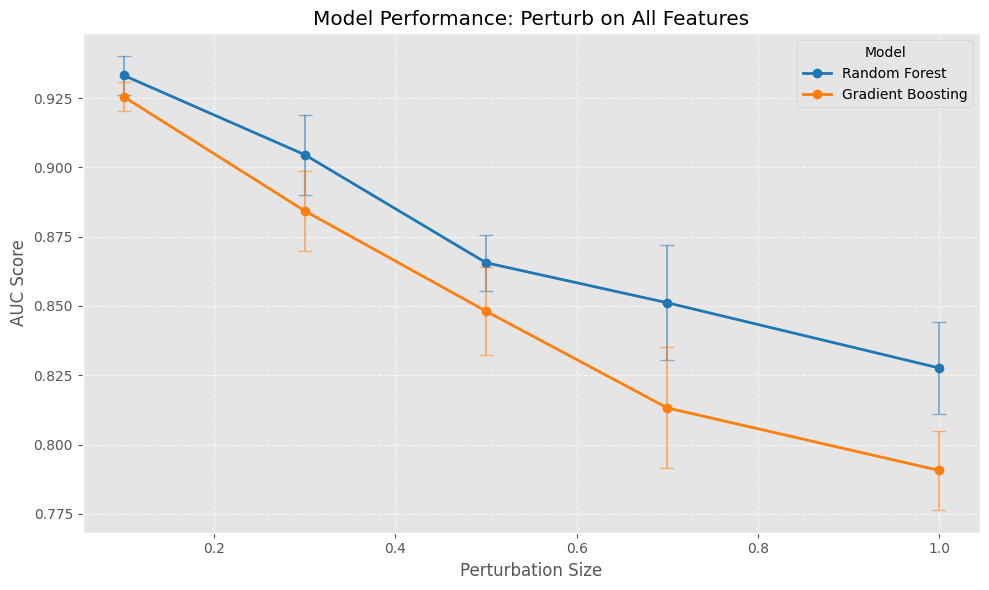

In [6]:
# 1. Compare models
fig1 = RobustnessViz.plot_models_comparison(
    results=results,
    metric_name='AUC Score'
)
plt.show()

### 6.2 Performance Distribution for Random Forest

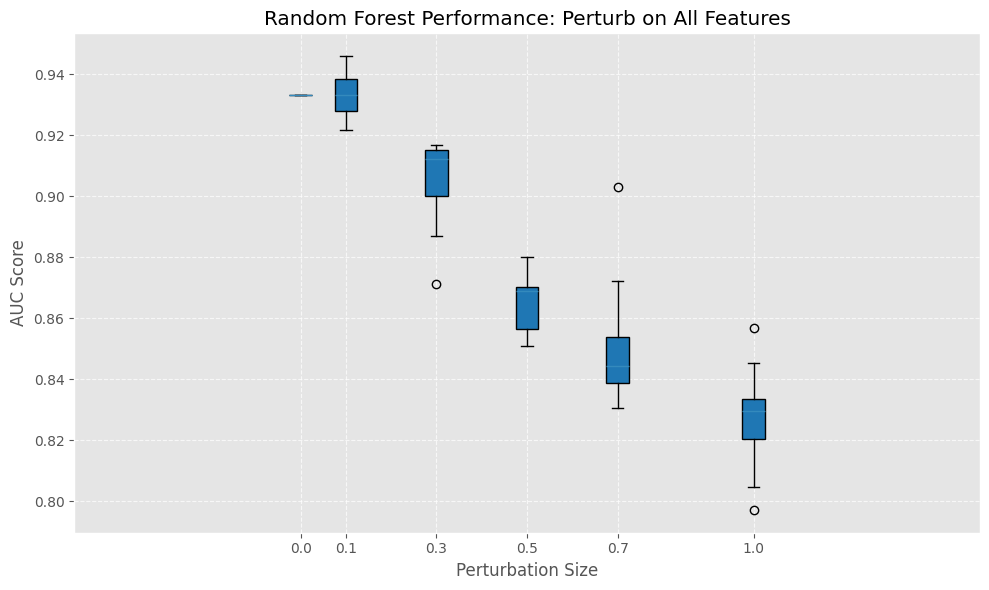

In [7]:
# 2. Examine performance distribution for Random Forest
fig2 = RobustnessViz.plot_boxplot_performance(
    results=results,
    model_name='Random Forest',
    metric_name='AUC Score'
)
plt.show()

### 6.3 Robustness Indices Comparison

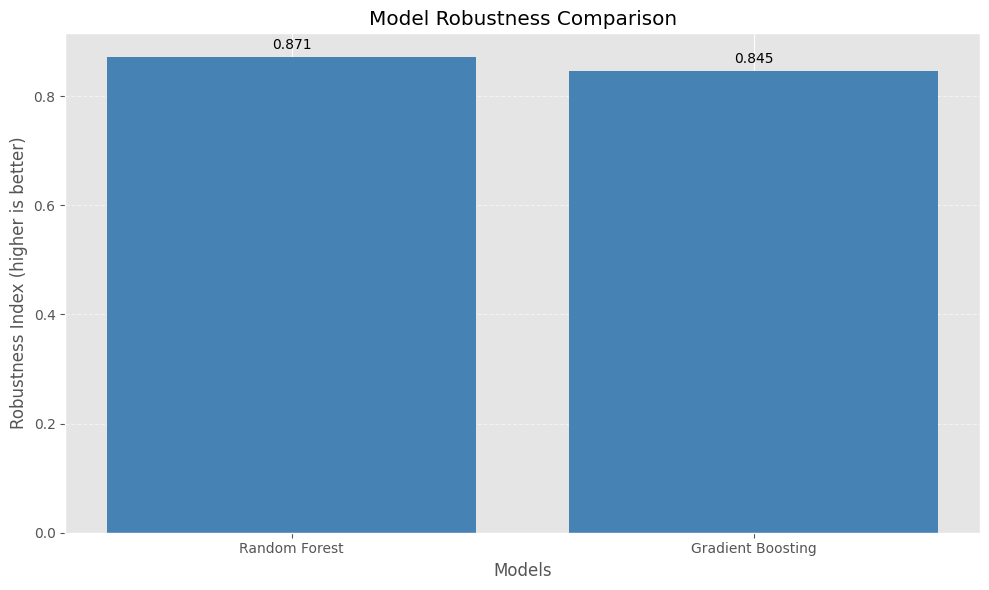

In [8]:
# 3. Plot robustness indices
fig3 = RobustnessViz.plot_robustness_index(
    results=results,
    robustness_indices=robustness_indices,
    title='Model Robustness Comparison'
)
plt.show()

## 7. Feature Importance Analysis

/home/guhaase/projetos/deepbridge_homol/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/guhaase/projetos/deepbridge_homol/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/guhaase/projetos/deepbridge_homol/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/guhaase/projetos/deepbridge_homol/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/guhaase/projetos/deepbridge_homol/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Ran

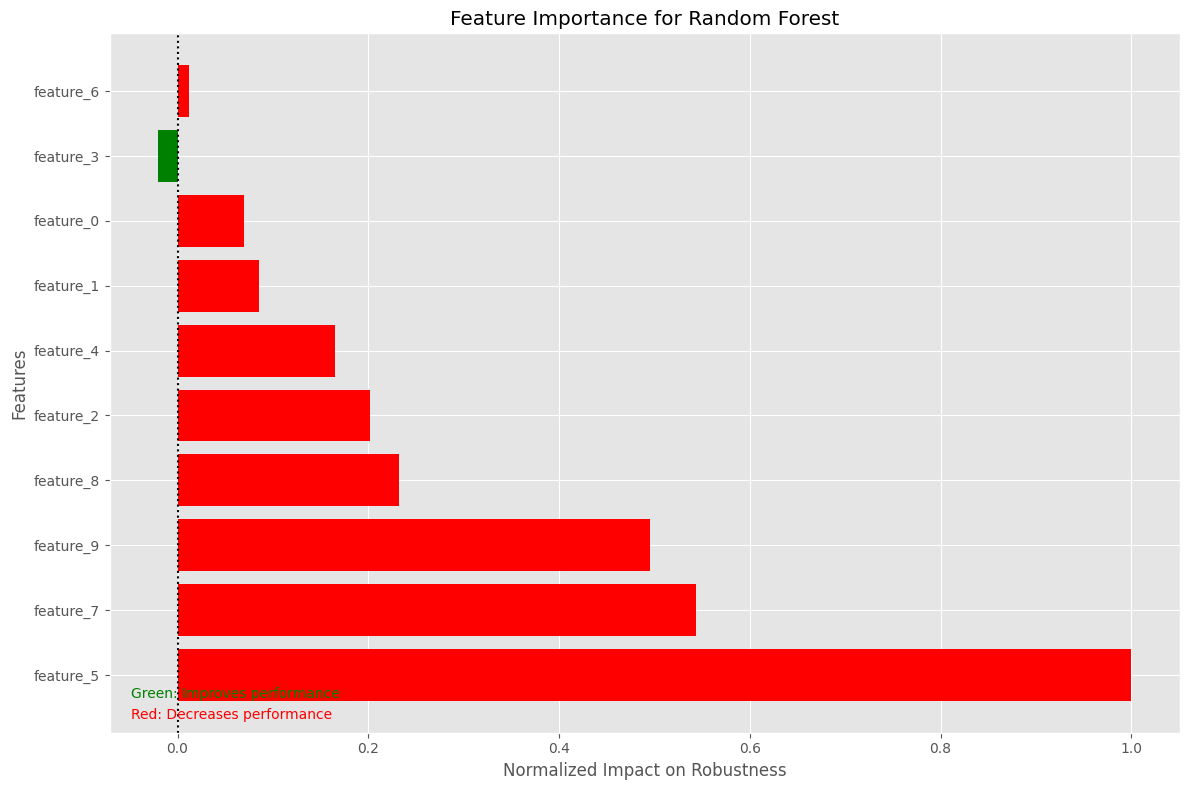

In [9]:
# 4. Analyze feature importance for Random Forest
feature_importance = robustness_test.analyze_feature_importance(
    model=rf_model,
    X=X_test,
    y=y_test,
    perturb_method='raw',
    perturb_size=0.5,
    metric='AUC',
    n_iterations=5,
    random_state=42
)

fig4 = RobustnessViz.plot_feature_importance(
    feature_importance_results=feature_importance,
    title='Feature Importance for Random Forest'
)
plt.show()

## 8. Comparing Perturbation Methods

/home/guhaase/projetos/deepbridge_homol/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/guhaase/projetos/deepbridge_homol/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/guhaase/projetos/deepbridge_homol/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/guhaase/projetos/deepbridge_homol/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/guhaase/projetos/deepbridge_homol/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Ran

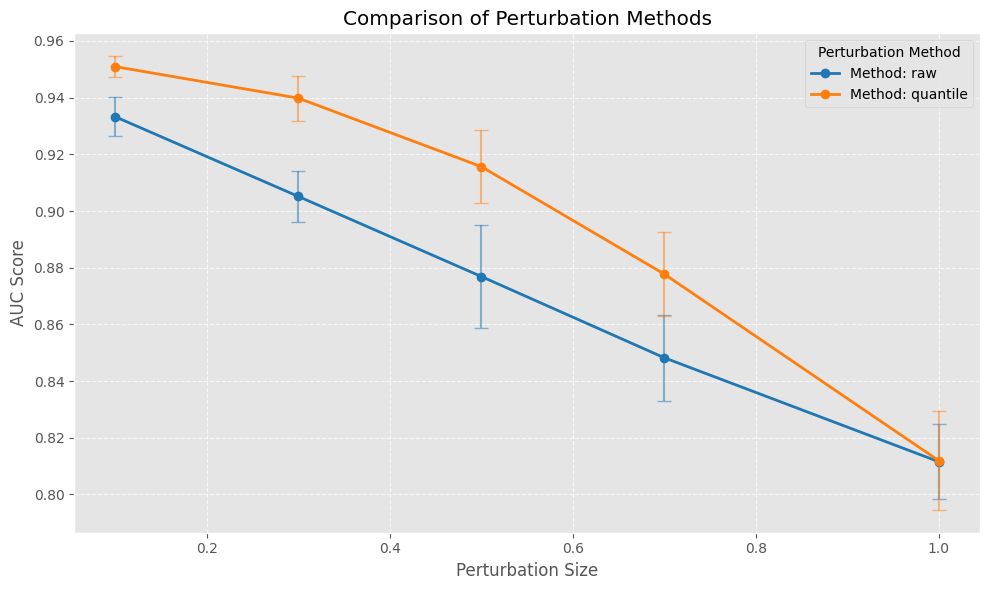

In [10]:
# 5. Compare perturbation methods
methods_results = robustness_test.compare_perturbation_methods(
    model=rf_model,
    X=X_test,
    y=y_test,
    perturb_methods=['raw', 'quantile'],
    perturb_sizes=[0.1, 0.3, 0.5, 0.7, 1.0],
    metric='AUC',
    n_iterations=10,
    random_state=42
)

fig5 = RobustnessViz.plot_perturbation_methods_comparison(
    methods_comparison_results=methods_results,
    metric_name='AUC Score'
)
plt.show()

## 9. Conclusion

In this notebook, we've demonstrated how to use DeepBridge's robustness testing capabilities to:

1. Evaluate the robustness of different models against input perturbations
2. Compare and visualize model performance under varying perturbation intensities
3. Calculate and visualize robustness indices
4. Identify which features have the greatest impact on model robustness
5. Compare different perturbation methods

These tools can help you build more reliable and trustworthy machine learning models by understanding how they react to changes in the input data.

Evaluating model robustness...


TypeError: '<' not supported between instances of 'str' and 'int'

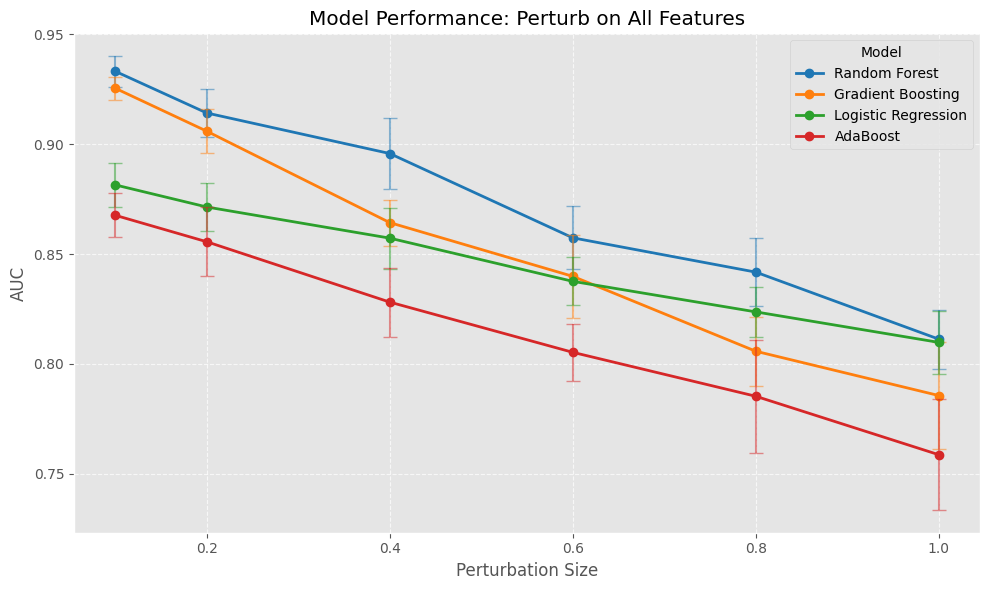

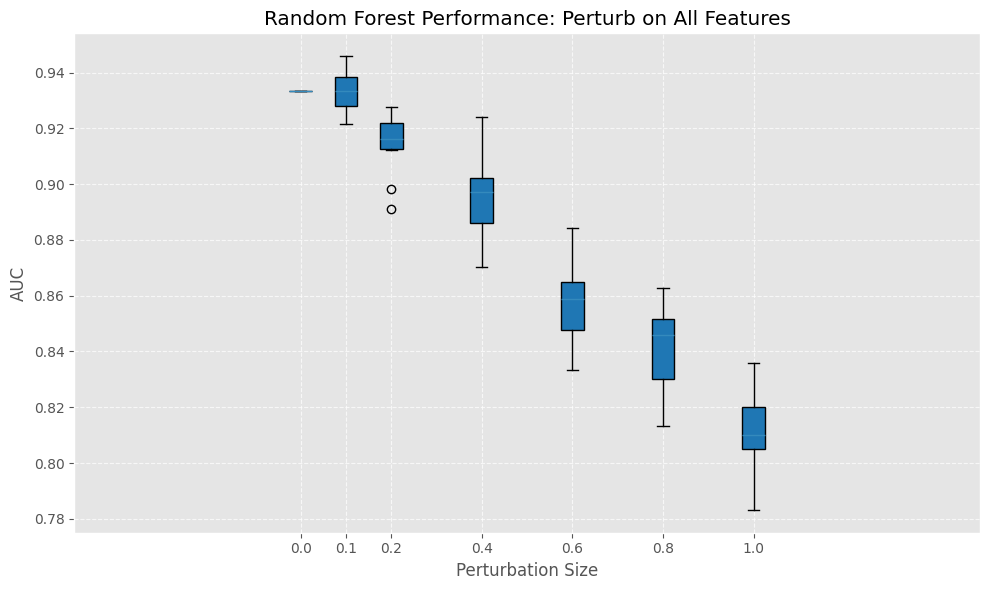

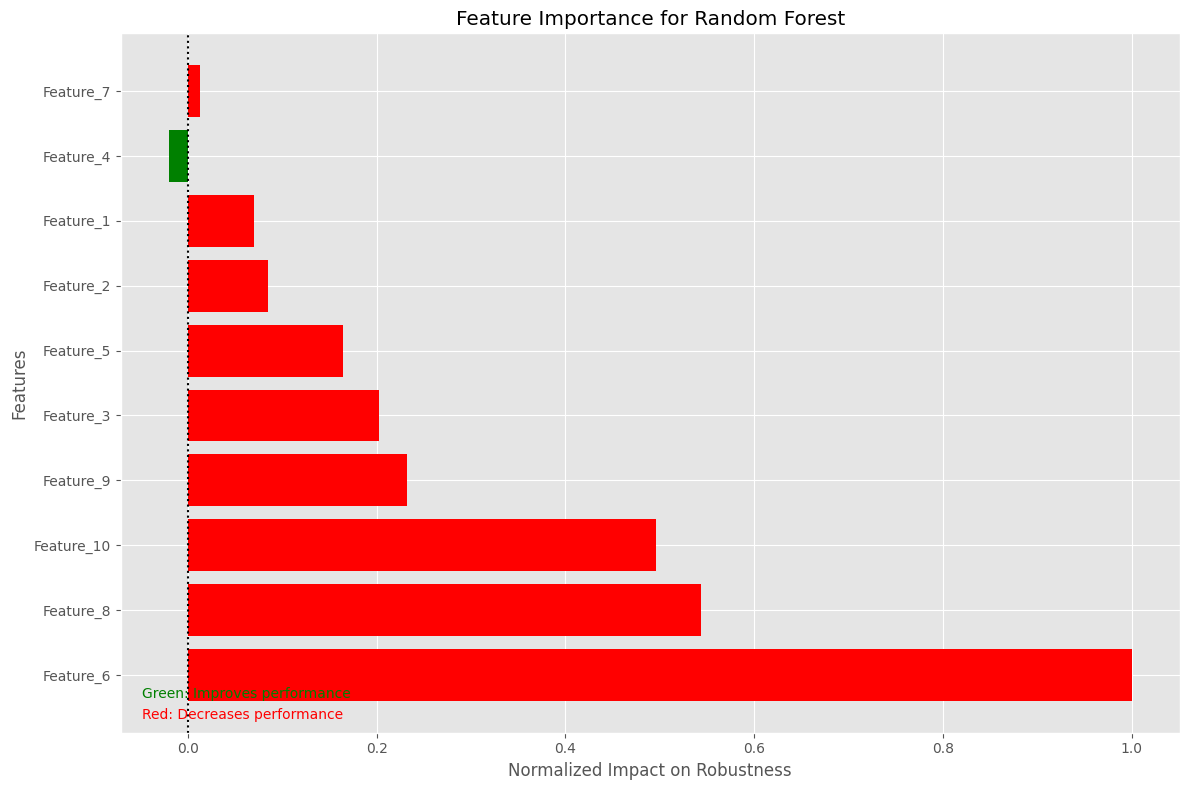

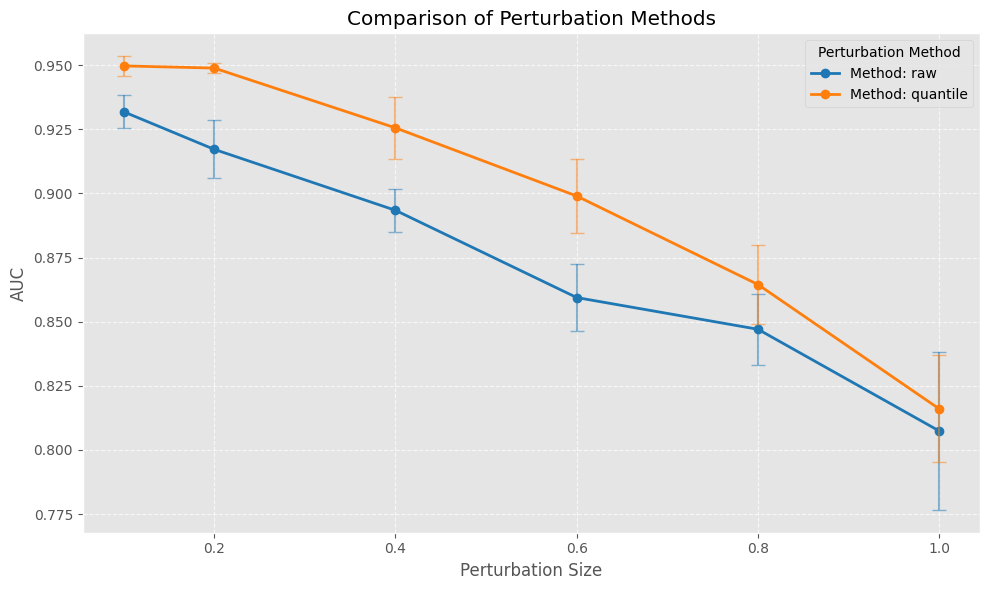

In [11]:
"""
Example demonstrating how to generate an HTML robustness report using DeepBridge.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import os

# Import DeepBridge components
from deepbridge.validation import RobustnessTest, RobustnessScore
from deepbridge.visualization import RobustnessViz
from deepbridge.utils.robustness_report_generator import RobustnessReportGenerator
from deepbridge.utils import generate_robustness_report

def main():
    # Create output directory
    output_dir = "robustness_reports"
    os.makedirs(output_dir, exist_ok=True)
    
    # Generate synthetic data
    X, y = make_classification(
        n_samples=1000, 
        n_features=10, 
        n_informative=6, 
        n_redundant=2,
        random_state=42
    )
    
    # Add column names for better report
    X = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(X.shape[1])])
    
    # Split into train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Train multiple models
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
    lr_model = LogisticRegression(random_state=42)
    ab_model = AdaBoostClassifier(random_state=42)
    
    rf_model.fit(X_train, y_train)
    gb_model.fit(X_train, y_train)
    lr_model.fit(X_train, y_train)
    ab_model.fit(X_train, y_train)
    
    # Create a dictionary of models
    models = {
        'Random Forest': rf_model,
        'Gradient Boosting': gb_model,
        'Logistic Regression': lr_model,
        'AdaBoost': ab_model
    }
    
    print("Evaluating model robustness...")
    
    # Method 1: Use the integrated function to generate a complete report
    output_path = os.path.join(output_dir, "complete_robustness_report.html")
    
    html_report, analysis_results = generate_robustness_report(
        models=models,
        X=X_test,
        y=y_test,
        perturb_method='raw',
        perturb_sizes=[0.1, 0.2, 0.4, 0.6, 0.8, 1.0],
        metric='AUC',
        n_iterations=10,
        analyze_features=True,
        compare_methods=True,
        output_path=output_path,
        random_state=42
    )
    
    print(f"Complete report generated: {output_path}")
    
    # Method 2: Generate a customized report with more control
    print("\nGenerating customized report...")
    
    # Initialize robustness test
    robustness_test = RobustnessTest()
    
    # Evaluate model robustness
    results = robustness_test.evaluate_robustness(
        models={'Random Forest': rf_model, 'Gradient Boosting': gb_model},
        X=X_test,
        y=y_test,
        perturb_method='raw',
        perturb_sizes=[0.1, 0.3, 0.5, 0.7, 1.0],
        metric='AUC',
        n_iterations=10,
        random_state=42
    )
    
    # Calculate robustness indices
    robustness_indices = RobustnessScore.calculate_robustness_index(
        results=results,
        metric='AUC'
    )
    
    # Create visualizations
    models_comparison_fig = RobustnessViz.plot_models_comparison(
        results=results,
        metric_name='AUC Score'
    )
    
    boxplot_fig = RobustnessViz.plot_boxplot_performance(
        results=results,
        model_name='Random Forest',
        metric_name='AUC Score'
    )
    
    # Analyze feature importance
    feature_importance = robustness_test.analyze_feature_importance(
        model=rf_model,
        X=X_test,
        y=y_test,
        perturb_method='raw',
        perturb_size=0.5,
        metric='AUC',
        n_iterations=5,
        random_state=42
    )
    
    feature_importance_fig = RobustnessViz.plot_feature_importance(
        feature_importance_results=feature_importance,
        title='Feature Importance for Random Forest'
    )
    
    # Compare perturbation methods
    methods_results = robustness_test.compare_perturbation_methods(
        model=rf_model,
        X=X_test,
        y=y_test,
        perturb_methods=['raw', 'quantile'],
        perturb_sizes=[0.1, 0.3, 0.5, 0.7, 1.0],
        metric='AUC',
        n_iterations=10,
        random_state=42
    )
    
    perturbation_methods_fig = RobustnessViz.plot_perturbation_methods_comparison(
        methods_comparison_results=methods_results,
        metric_name='AUC Score'
    )
    
    # Generate HTML report
    report_generator = RobustnessReportGenerator()
    
    custom_report_path = os.path.join(output_dir, "custom_robustness_report.html")
    
    html_report = report_generator.generate_report(
        robustness_results=results,
        robustness_indices=robustness_indices,
        feature_importance_fig=feature_importance_fig,
        boxplot_fig=boxplot_fig,
        models_comparison_fig=models_comparison_fig,
        perturbation_methods_fig=perturbation_methods_fig,
        feature_importance_results=feature_importance,
        output_path=custom_report_path
    )
    
    print(f"Custom report generated: {custom_report_path}")
    print("\nDone!")

if __name__ == "__main__":
    main()

In [ ]:
def apply_quick_fix():
    """Apply a quick fix to the RobustnessReportGenerator to resolve type comparison errors."""
    from deepbridge.utils.robustness_report_generator import RobustnessReportGenerator
    
    # Store the original method for reference
    original_format_value = RobustnessReportGenerator._format_value
    
    # Define the fixed method
    def fixed_format_value(self, value, precision=4):
        """Fixed format_value to prevent type comparison errors."""
        # Handle None values
        if value is None:
            return "N/A"
            
        # Handle string values
        if isinstance(value, str):
            return value
            
        # Handle numeric values
        try:
            return f"{float(value):.{precision}f}"
        except (ValueError, TypeError):
            # Fall back to string representation
            return str(value)
    
    # Replace the method
    RobustnessReportGenerator._format_value = fixed_format_value
    
    print("Applied quick fix to RobustnessReportGenerator._format_value")
    return "Fix applied successfully"

In [ ]:
def comprehensive_fix():
    """Apply comprehensive fixes to RobustnessReportGenerator to resolve type comparison errors."""
    from deepbridge.utils.robustness_report_generator import RobustnessReportGenerator
    
    # Fix for _format_value method
    def fixed_format_value(self, value, precision=4):
        """Fixed format_value to prevent type comparison errors."""
        if value is None:
            return "N/A"
            
        if isinstance(value, str):
            return value
            
        try:
            return f"{float(value):.{precision}f}"
        except (ValueError, TypeError):
            return str(value)
    
    # Fix for _get_robustness_color method
    def fixed_get_robustness_color(self, index):
        """Get color based on robustness index value with type checking."""
        try:
            index_value = float(index)
            if index_value >= 0.8:
                return "#28a745"  # Success green
            elif index_value >= 0.6:
                return "#17a2b8"  # Info blue
            elif index_value >= 0.4:
                return "#ffc107"  # Warning yellow
            else:
                return "#dc3545"  # Danger red
        except (ValueError, TypeError):
            # Default color if conversion fails
            return "#6c757d"  # Gray
    
    # Replace the methods
    RobustnessReportGenerator._format_value = fixed_format_value
    RobustnessReportGenerator._get_robustness_color = fixed_get_robustness_color
    
    print("Applied comprehensive fixes to RobustnessReportGenerator")
    return "Fixes applied successfully"

In [ ]:
comprehensive_fix()

In [ ]:
"""
Complete quick fix implementation to resolve the TypeError when generating robustness reports.
Add this at the top of your script before calling any report generation functions.
"""

def apply_quick_fix():
    """Apply a quick fix to the RobustnessReportGenerator to resolve type comparison errors."""
    from deepbridge.utils.robustness_report_generator import RobustnessReportGenerator
    
    # Define the fixed method
    def fixed_format_value(self, value, precision=4):
        """Fixed format_value to prevent type comparison errors."""
        if value is None:
            return "N/A"
            
        if isinstance(value, str):
            return value
            
        try:
            if isinstance(value, (int, float)):
                return f"{float(value):.{precision}f}"
            else:
                return f"{float(value):.{precision}f}"
        except (ValueError, TypeError):
            return str(value)
    
    # Replace the method
    RobustnessReportGenerator._format_value = fixed_format_value
    
    print("Applied quick fix to RobustnessReportGenerator._format_value")
    return "Fix applied successfully"


# Usage in your main script:
if __name__ == "__main__":
    import os
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import train_test_split
    from sklearn.datasets import make_classification
    
    # Import DeepBridge components
    from deepbridge.validation import RobustnessTest, RobustnessScore
    from deepbridge.visualization import RobustnessViz
    from deepbridge.utils.robustness_report_generator import RobustnessReportGenerator
    from deepbridge.utils import generate_robustness_report
    
    # Apply the quick fix before any report generation
    apply_quick_fix()
    
    def main():
        # Create output directory
        output_dir = "robustness_reports"
        os.makedirs(output_dir, exist_ok=True)
        
        # Generate synthetic data
        X, y = make_classification(
            n_samples=1000, 
            n_features=10, 
            n_informative=6, 
            n_redundant=2,
            random_state=42
        )
        
        # Add column names for better report
        X = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(X.shape[1])])
        
        # Split into train/test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        
        # Train multiple models
        rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
        gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
        lr_model = LogisticRegression(random_state=42)
        ab_model = AdaBoostClassifier(random_state=42)
        
        rf_model.fit(X_train, y_train)
        gb_model.fit(X_train, y_train)
        lr_model.fit(X_train, y_train)
        ab_model.fit(X_train, y_train)
        
        # Create a dictionary of models
        models = {
            'Random Forest': rf_model,
            'Gradient Boosting': gb_model,
            'Logistic Regression': lr_model,
            'AdaBoost': ab_model
        }
        
        print("Evaluating model robustness...")
        
        # Method 1: Use the integrated function to generate a complete report
        output_path = os.path.join(output_dir, "complete_robustness_report.html")
        
        html_report, analysis_results = generate_robustness_report(
            models=models,
            X=X_test,
            y=y_test,
            perturb_method='raw',
            perturb_sizes=[0.1, 0.2, 0.4, 0.6, 0.8, 1.0],
            metric='AUC',
            n_iterations=10,
            analyze_features=True,
            compare_methods=True,
            output_path=output_path,
            random_state=42
        )
        
        print(f"Complete report generated: {output_path}")
        
        # Method 2: Generate a customized report with more control
        print("\nGenerating customized report...")
        
        # Initialize robustness test
        robustness_test = RobustnessTest()
        
        # Evaluate model robustness
        results = robustness_test.evaluate_robustness(
            models={'Random Forest': rf_model, 'Gradient Boosting': gb_model},
            X=X_test,
            y=y_test,
            perturb_method='raw',
            perturb_sizes=[0.1, 0.3, 0.5, 0.7, 1.0],
            metric='AUC',
            n_iterations=10,
            random_state=42
        )
        
        # Calculate robustness indices
        robustness_indices = RobustnessScore.calculate_robustness_index(
            results=results,
            metric='AUC'
        )
        
        # Create visualizations
        models_comparison_fig = RobustnessViz.plot_models_comparison(
            results=results,
            metric_name='AUC Score'
        )
        
        boxplot_fig = RobustnessViz.plot_boxplot_performance(
            results=results,
            model_name='Random Forest',
            metric_name='AUC Score'
        )
        
        # Analyze feature importance
        feature_importance = robustness_test.analyze_feature_importance(
            model=rf_model,
            X=X_test,
            y=y_test,
            perturb_method='raw',
            perturb_size=0.5,
            metric='AUC',
            n_iterations=5,
            random_state=42
        )
        
        feature_importance_fig = RobustnessViz.plot_feature_importance(
            feature_importance_results=feature_importance,
            title='Feature Importance for Random Forest'
        )
        
        # Compare perturbation methods
        methods_results = robustness_test.compare_perturbation_methods(
            model=rf_model,
            X=X_test,
            y=y_test,
            perturb_methods=['raw', 'quantile'],
            perturb_sizes=[0.1, 0.3, 0.5, 0.7, 1.0],
            metric='AUC',
            n_iterations=10,
            random_state=42
        )
        
        perturbation_methods_fig = RobustnessViz.plot_perturbation_methods_comparison(
            methods_comparison_results=methods_results,
            metric_name='AUC Score'
        )
        
        # Generate HTML report
        report_generator = RobustnessReportGenerator()
        
        custom_report_path = os.path.join(output_dir, "custom_robustness_report.html")
        
        html_report = report_generator.generate_report(
            robustness_results=results,
            robustness_indices=robustness_indices,
            feature_importance_fig=feature_importance_fig,
            boxplot_fig=boxplot_fig,
            models_comparison_fig=models_comparison_fig,
            perturbation_methods_fig=perturbation_methods_fig,
            feature_importance_results=feature_importance,
            output_path=custom_report_path
        )
        
        print(f"Custom report generated: {custom_report_path}")
        print("\nDone!")

    main()